In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## 1. Univariate exploration of data

### 1.1 Bar Charts:

If you are interested in the distribution of your categorical variables, your primary visualization will probably be the bar charts.

The baseline of bars should start from zero.

For nominal variables you can arrange the data in order of frequency but you should not be inclined to do this with ordinal data.




In [ ]:
# read the data:
pokemon = pd.read_csv('/content/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


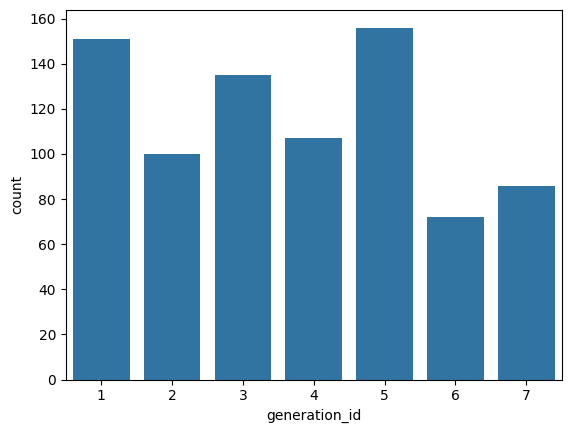

In [ ]:
# Create a bar chart for generation variable:
sb.countplot(data = pokemon, x = 'generation_id');

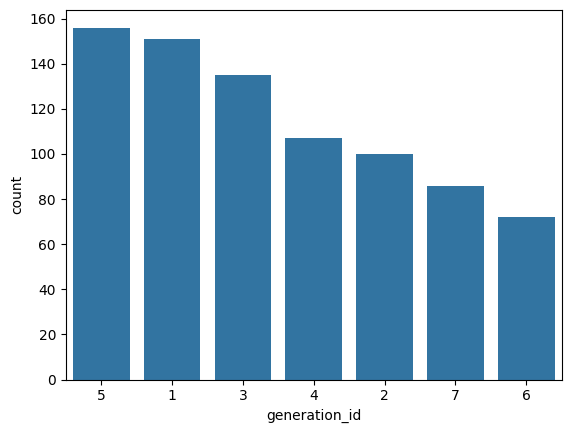

In [ ]:
# To plot the variables in order of the frequency (because nominal variable):
# calculate the frequency of each category and sort them:
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', order = gen_order);

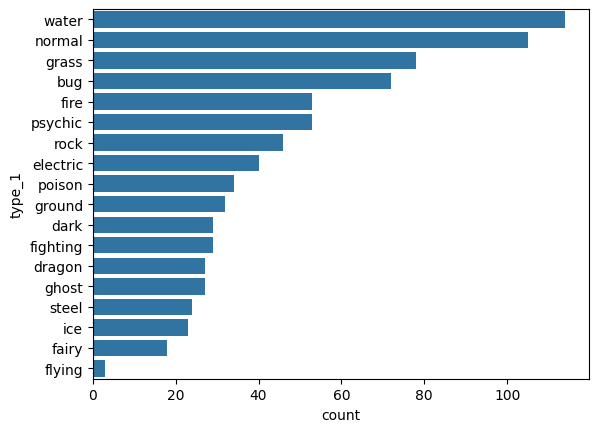

In [ ]:
# Create an horizental bar charts for a nominal variable : type_1:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = pokemon['type_1'], order = type_order);

/tmp/ipython-input-3558754979.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = type_counts[i]


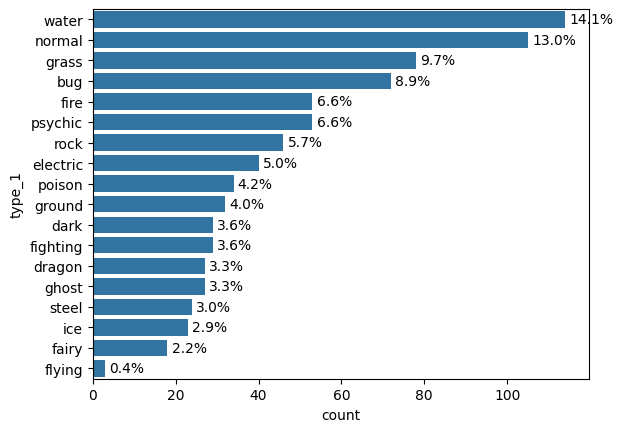

In [ ]:
# Adding relative frequnecy to the bars:
type_counts = pokemon['type_1'].value_counts()
type_order = type_counts.index
sb.countplot(data = pokemon, y = 'type_1', order = type_order);
for i in range(type_counts.shape[0]):
  count = type_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/pokemon.shape[0])
  plt.text(count+1, i, pct_string, va='center');


### 1.2 Pie Charts:

The pie chart is used to plot relative frequencies for quantitative variables. However the bar charts should be your first choice for exploring qualitative variables.

### 1.3 Histograms:

If you have a quantitative variable, then your plot of choice will probably be the histogram by splitting the values in bins.

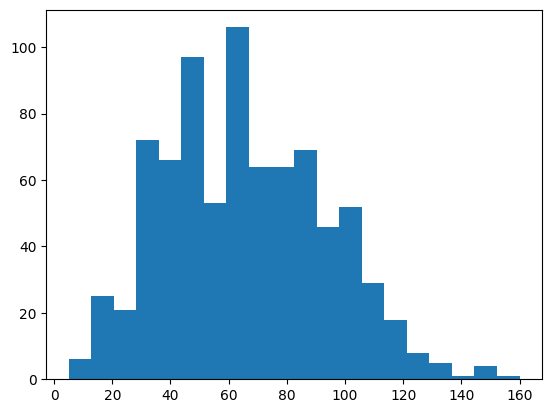

In [ ]:
# We can use plt.hist to create a histograms;
# the default values for bins is 10:
plt.hist(data = pokemon, x = 'speed', bins = 20);

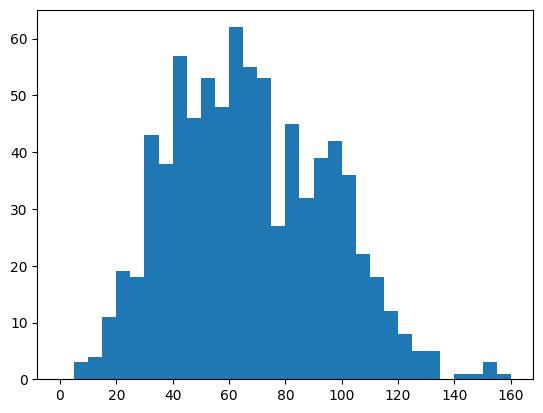

In [ ]:
# Create a histograms with a list of bins:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

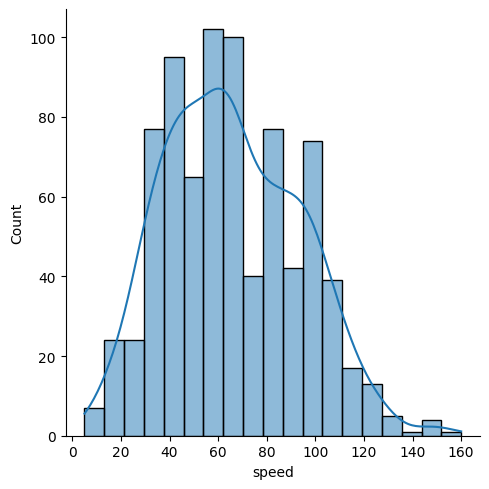

In [ ]:
# Create a histogram with a KDE using seaborn:
# note we give it just data['var'] as paramater:
sb.displot(pokemon['speed'], kde=True);

### 1.4 Figures, axes and supplots:

The base of a visualization in matplotlib is a **Figure** object.

Contained within each Figure will be one or more **Axes** objects.

Each Axes object containing a number of other elements that represent each plot.

In the earliest examples, these objects have been created implicitly.

Let's say that the following expression is run inside a Jupyter notebook to create a histogram: 'plt.hist(data = df, x = 'num_var')'

Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

figure() creates a new Figure object, a reference to which has been stored in the variable fig.

One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure.

The method requires one list as argument specifying the dimensions of the Axes:

- The first two elements of the list the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure).
- The last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable ax. Finally, we use the Axes method .hist() just like we did before with plt.hist().





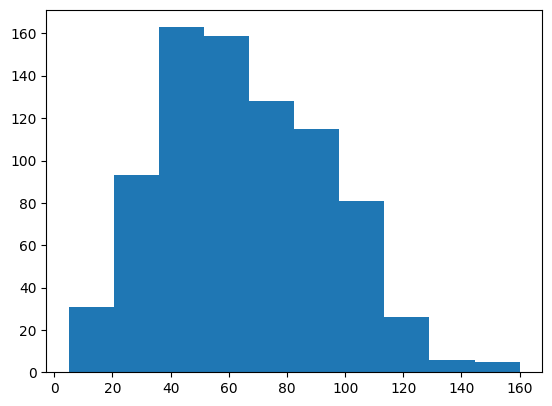

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

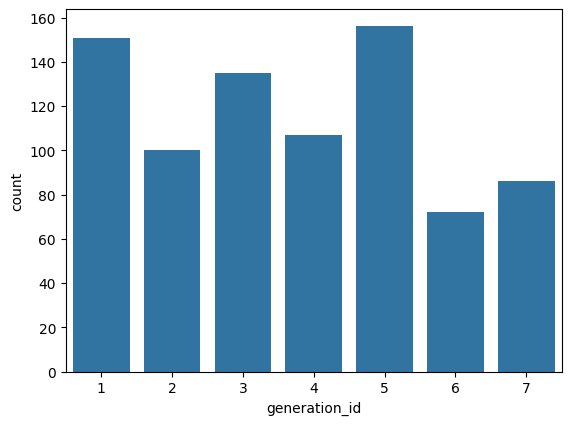

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
sb.countplot(data=pokemon, x='generation_id', ax=ax);

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how subplot() was used on the Histograms page:



First of all, plt.figure(figsize = [10, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively.

Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments.

The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot.

Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.).

Again, Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.


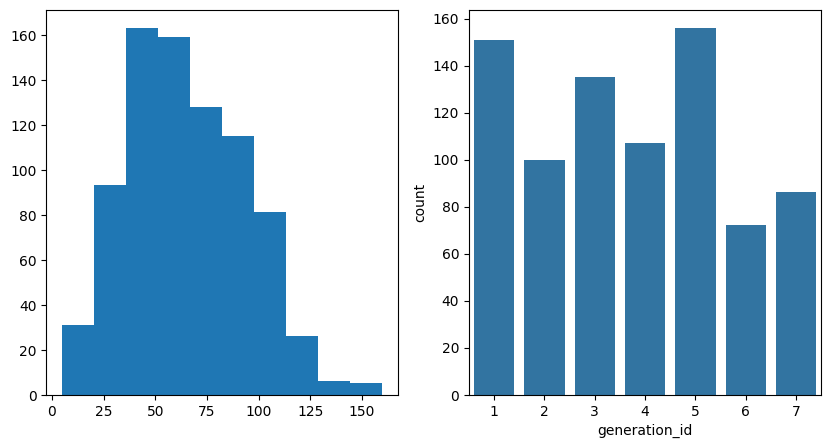

In [ ]:
plt.figure(figsize = [10,5]) # larger figure size for subplots
# first figure a histplt:
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(data=pokemon, x='speed');

# second figure a countplot:
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.countplot(data=pokemon, x='generation_id');


### 1.5 Choosing a plot for discrete data:

If you want to plot a discrete quantitative variable, there’s a couple of ideas that you’ll want to consider.

Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

We use "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.



In [ ]:
# create a df of 100 dice rolls:
df = pd.DataFrame({"roll": np.random.randint(2, 13, 100)})

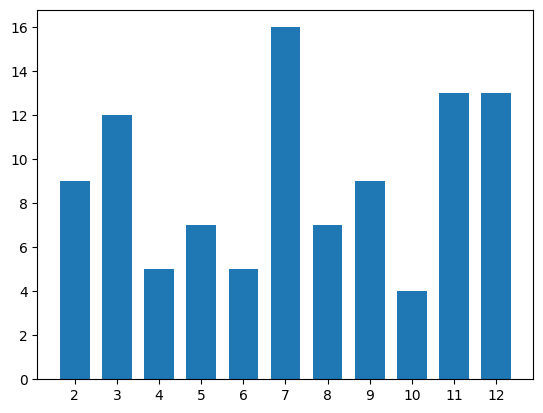

In [ ]:
# Create a histogram:
bin_edges = np.arange(1.5, 13.5, 1)
plt.hist(data=df, x='roll', bins=bin_edges, rwidth=0.7);
plt.xticks(np.arange(2, 12+1, 1));

### 1.6 Descriptive Statistics, Outliers and Axis Limits:



In [ ]:
# Example of a df:
data = np.concatenate([
    np.random.gamma(shape=2, scale=3, size=300),  # bulk of data
    np.random.uniform(40, 100, size=10)           # outliers
])
df = pd.DataFrame({'skew_var': data})

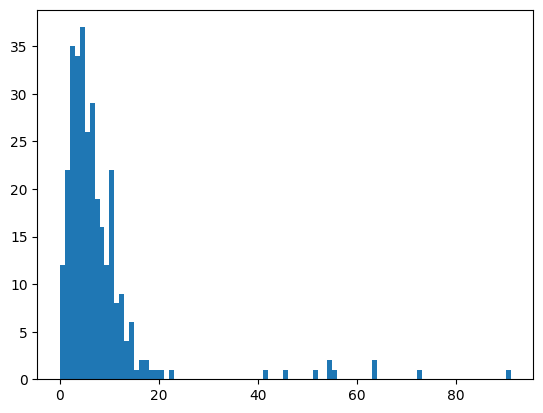

In [ ]:
# Plot the hist of the skew_var:
bins_edge = np.arange(0, df['skew_var'].max()+1, 1)
plt.hist(data=df, x='skew_var', bins=bins_edge);

We want to show values between 0 and 35.

This is helpful when extreme outliers are present and you want to “zoom in” on the bulk of the distribution.

You use this pattern when:

✔ You want to inspect the distribution of a skewed variable. Especially when:

- data has outliers

- most of the values are in a smaller range

✔ You want fine control over the bin width:

- Here bins are exactly 1 unit wide, which gives a more detailed shape of the distribution.

✔ You want to ignore extreme tail values:

- By limiting the axis, you prevent large outliers from shrinking the rest of the histogram visually.

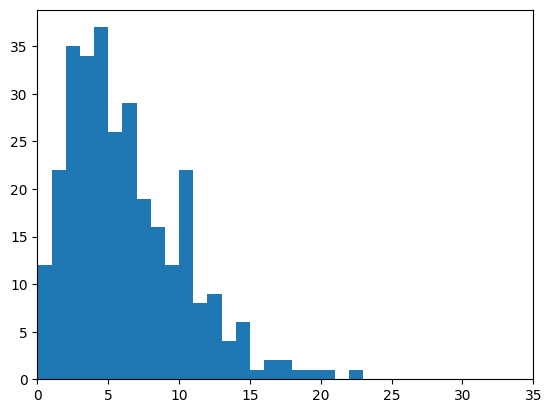

In [ ]:
bins_edge = np.arange(0, 35+1, 1)
plt.hist(data=df, x='skew_var', bins=bins_edge);
plt.xlim((0,35));

### 1.7 Scales and transformations:

A log transformation means applying the logarithm (commonly log base 10, log base 2, or natural log) to each data point:

- Your data must be positive (log of negative or zero is undefined).
- Often used in financial data, biological data, earthquake magnitude, population growth, etc.

It turns multiplicative relationships into additive ones, and compresses large values while stretching small values.

In [ ]:
# show the descriptive information of the var and apply log to decide the boundaries:
np.log10(pokemon['weight'].describe())

,weight
count,2.906874
mean,1.790786
std,2.047350
min,-1.000000
25%,0.954243
50%,1.431364
75%,1.799341
max,2.999957


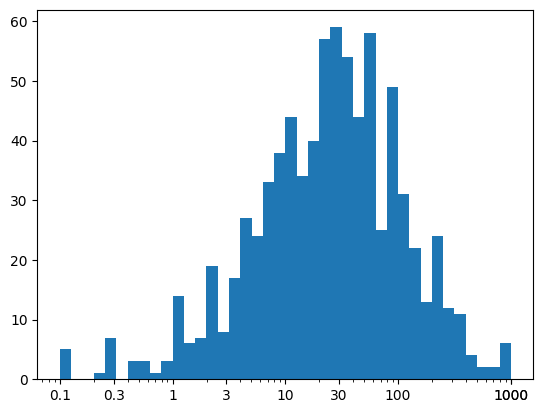

In [ ]:
# Create a histogram:
bins_edge = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins_edge);
# transform the weight var into log:
plt.xscale('log');
# define some ticks:
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 1000, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

## 2. Bivariate exploration of data

- For quantitative variable vs quantitative variable we use
scatterplots

- For quantitative variable vs qualitative variable we use
violin plots

- For qualitative variable vs qualitative variable we use
clustered bar charts

### 2.1 Scatterplot and correlation:
The pattern of points can clearly show what kind of relationship exists between our 2 variables and its strength.

We quantity the strength of relationship between 2 variable through correlation coefficient.

If you have a discrete large number of data points or many overlapping points. In this cases, we can use: Sampling, Transparency and Jitter.

In [ ]:
# read the data:
fuel_econ = pd.read_csv('/content/fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


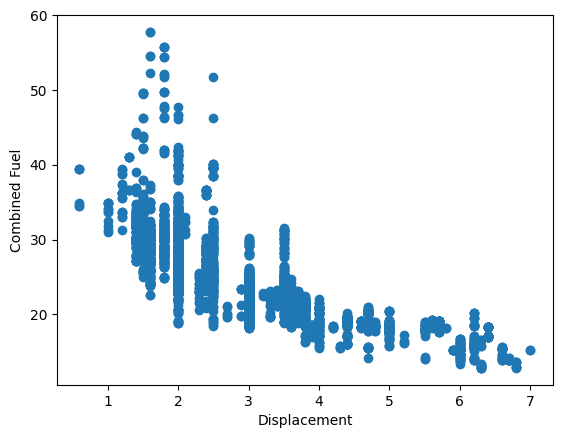

In [ ]:
# create an scatter plot using plt:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement');
plt.ylabel('Combined Fuel');

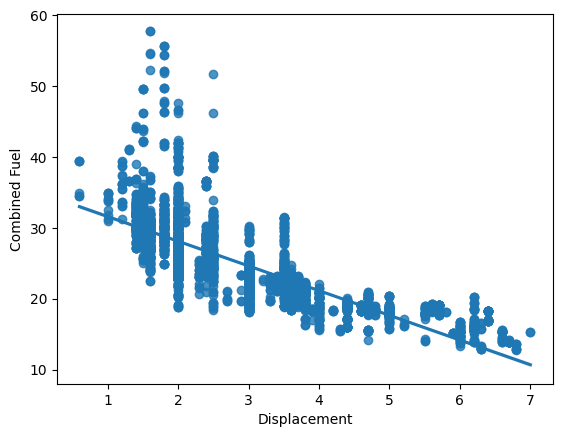

In [ ]:
# create a scatter plot using seaborn:
sb.regplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement');
plt.ylabel('Combined Fuel');

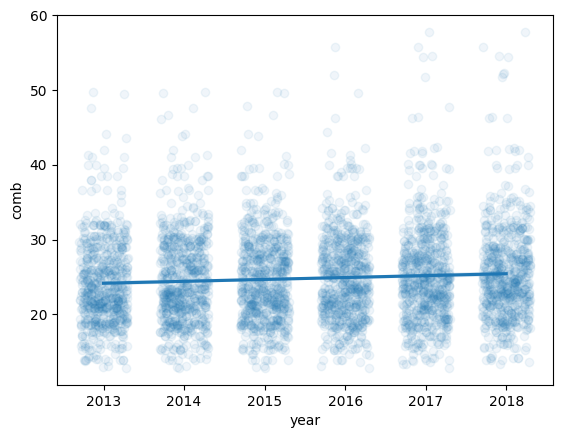

In [ ]:
# Aplly jitter and transparency to the plot:
sb.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3,
           scatter_kws = {'alpha':1/15});

### 2.2 Heat maps:

A heat map is favored over a scatter plot when:

- You have 2 discrete variables

- Good alternative to add transparency for a lot of data when you have a very large amount of data.

- You need to be aware of bin sizes.

In [ ]:
# see the staticts of the 2 variables:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


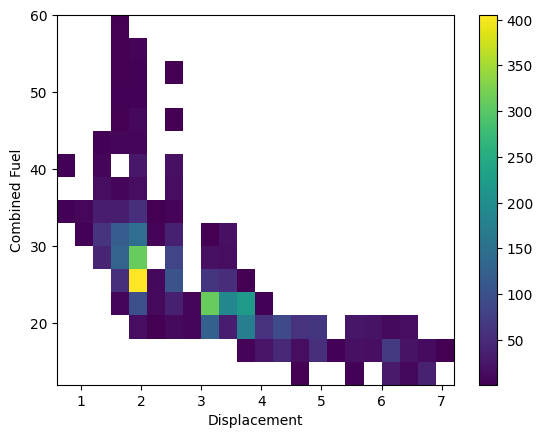

In [ ]:
# head map using plt:
# set up bins:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
# create the heat map:
plt.hist2d(data=fuel_econ, x='displ', y='comb',
           cmin=0.5, bins=[bins_x, bins_y]);
# for the color range:
plt.colorbar()
plt.xlabel('Displacement');
plt.ylabel('Combined Fuel');

### 2.3 Violin plots:

For a quantitative variable vs qualitative variable we can use the violin plot.

Instead of plotters data points, we have a curve for each categorical variable.
Where the curve is wider there are more data points.

In [ ]:
# Convert sedan classes into ordered type:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

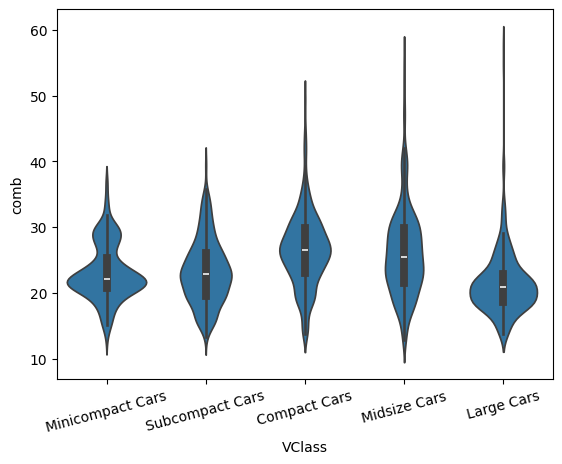

In [ ]:
# create a violin plot:
sb.violinplot(data=fuel_econ, x='VClass', y='comb');
# rotate the xticks:
plt.xticks(rotation=15);

### 2.4 Box plots:
Box plots are an other plot to visualize a quantitative variable against qualitative variable.


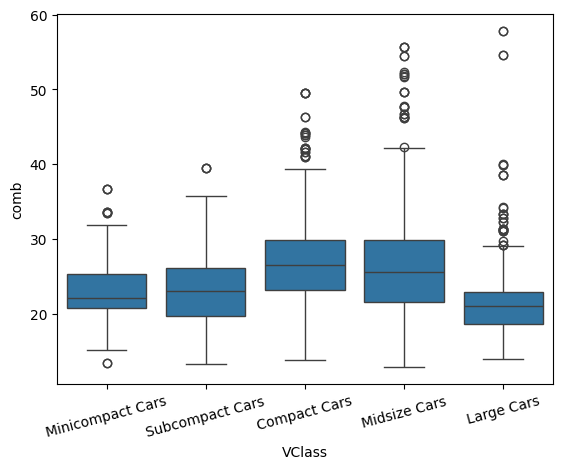

In [ ]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb');
plt.xticks(rotation=15);

### 2.5 Clustered bar charts:
It displays bars grouped together based on one category (like years), and different colors of bars inside each group represent another category (like product types).

**Example:**

- Sales of 3 products across 4 years — Compare Product A, B, C in each year.

- Test scores of boys vs girls in different subjects — Compare male vs female performance in each subject.

In [ ]:
# Create a new cat feature:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])


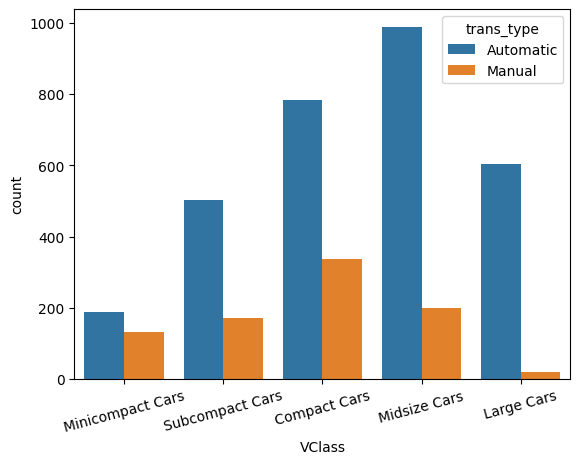

In [ ]:
# create clustered bar charts:
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type');
plt.xticks(rotation=15);

### 2.6 Faceting:

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels.

Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot.

- First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by ("cat_var" in our example).

- Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "num_var").



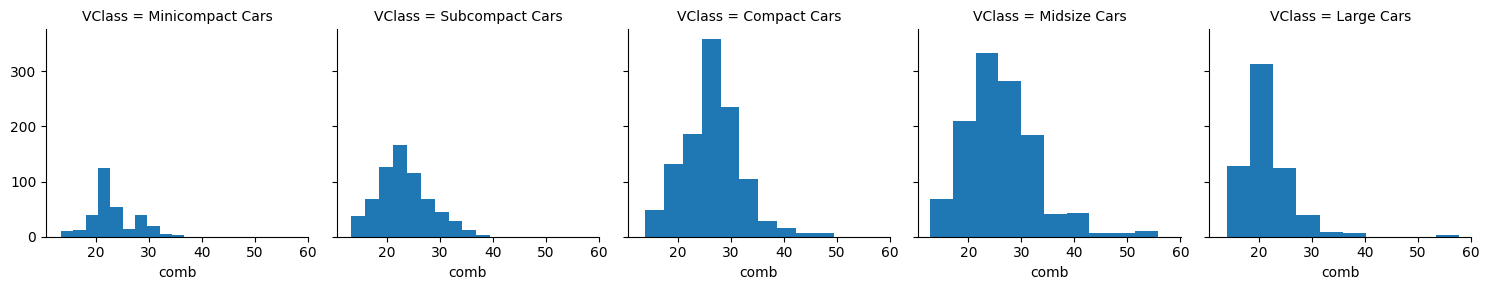

In [ ]:
g = sb.FacetGrid(data=fuel_econ, col='VClass');
g.map(plt.hist, 'comb');

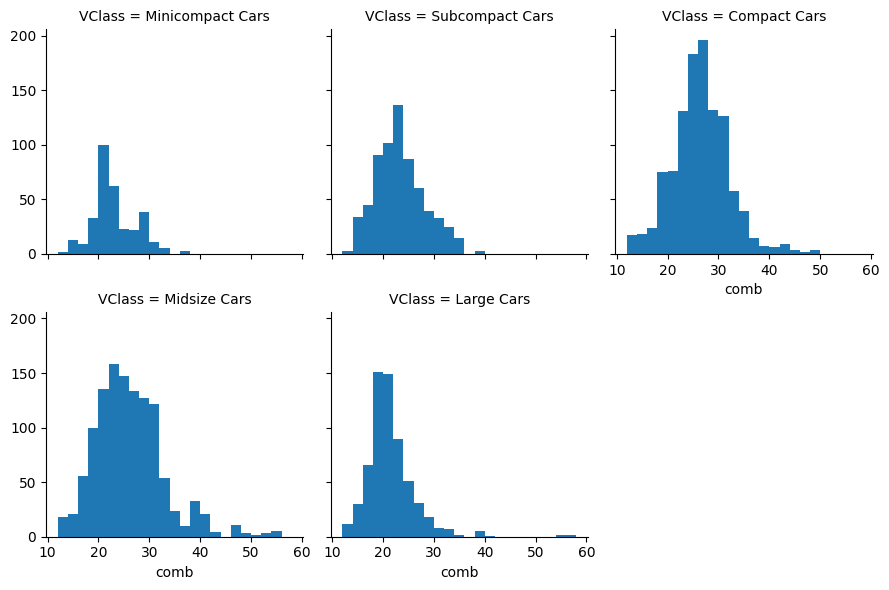

In [ ]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3); # col_wrap is to specify how plot by row
g.map(plt.hist, 'comb', bins=bins);

### 2.7 Adaptation of Univariate Plots:

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values.

These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

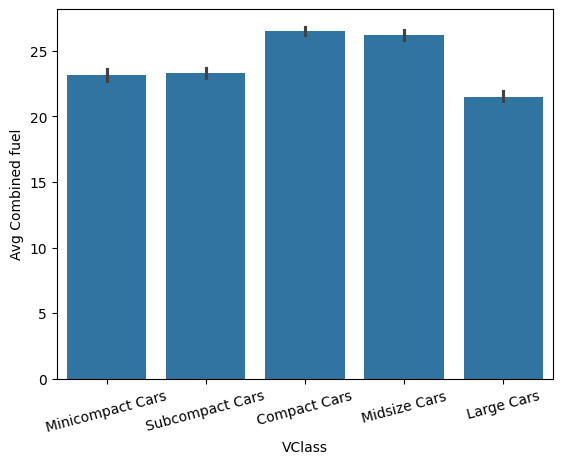

In [ ]:
sb.barplot(data=fuel_econ, x='VClass', y='comb');
plt.xticks(rotation=15);
plt.ylabel('Avg Combined fuel');


/tmp/ipython-input-2719135737.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.barplot(data=fuel_econ, x='VClass', y='comb', ci='sd');


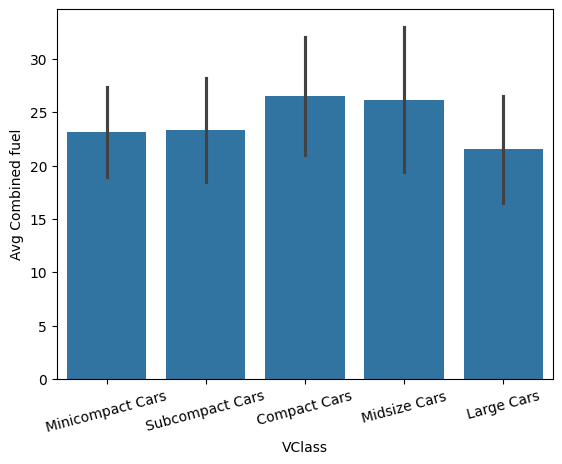

In [ ]:
# We can change the mean to std:
sb.barplot(data=fuel_econ, x='VClass', y='comb', ci='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg Combined fuel');